In [1]:
import pandas as pd

In [2]:
from tqdm import tqdm
import re

In [3]:
cricket_data = pd.read_excel('Cricket.xlsx')
restaurant_data = pd.read_excel('Restaurant.xlsx')

In [4]:
# Remove duplicate rows
cricket_data = cricket_data.drop_duplicates(subset=['Text'], keep='first')

In [5]:
# Remove duplicate rows
restaurant_data = restaurant_data.drop_duplicates(subset=['Text'], keep='first')

In [6]:
cricket_data['Polarity'].value_counts()

negative    1978
positive     505
neutral      237
Name: Polarity, dtype: int64

In [7]:
restaurant_data['Polarity'].value_counts()

positive    992
negative    386
neutral     236
conflict    100
Name: Polarity, dtype: int64

In [8]:
cricket_data = cricket_data[['Text', 'Polarity']]

In [9]:
restaurant_data = restaurant_data[['Text', 'Polarity']]

In [10]:
final_df = restaurant_data.append(cricket_data, ignore_index = True)

In [11]:
final_df

,Text,Polarity
0,"স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।",negative
1,"শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,পুরোপুরি ...",positive
2,"খাবার একদমই ব্যতিক্রমী, একটি খুব সক্ষম রান্নাঘ...",positive
3,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,positive
4,"একবার গিয়ে এটি উপভোগ করবেন না, আমি বলতে পারেন ...",positive
...,...,...
4429,"এরা সব বেহায়া,আর মানুষিক বৈকল্য ধারী । না হলে ...",negative
4430,নির্বাচকমণ্ডলী দের গালে জুতা মারা উচিত.. হালা...,negative
4431,"বস ভাল করবে ইটাই আশা করি,দারুন এরজন ব্যাটিং অল...",negative
4432,গুগল সার্চ করে মিনহাজের রানরেট দেখে নিন? এভারে...,negative


# EDA

In [12]:
df = final_df

In [13]:
df.shape

(4434, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      4434 non-null   object
 1   Polarity  4434 non-null   object
dtypes: object(2)
memory usage: 69.4+ KB


In [15]:
df.describe()

,Text,Polarity
count,4434,4434
unique,4434,4
top,"স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।",negative
freq,1,2364


In [16]:
df.isnull().sum()

Text        0
Polarity    0
dtype: int64

negative    2364
positive    1497
neutral      473
conflict     100
Name: Polarity, dtype: int64


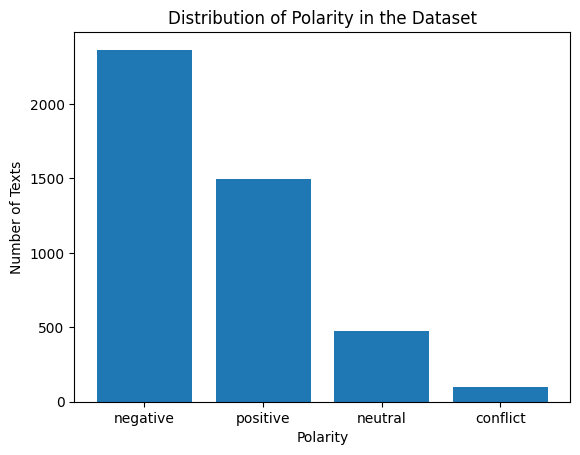

In [17]:
# Count the number of each polarity
print(df['Polarity'].value_counts())

# Plot the distribution of polarity
import matplotlib.pyplot as plt

plt.bar(df['Polarity'].value_counts().index, df['Polarity'].value_counts().values)
plt.xlabel('Polarity')
plt.ylabel('Number of Texts')
plt.title('Distribution of Polarity in the Dataset')
plt.show()


In [18]:
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌…Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)
    
    sent = sent.strip()
    return sent

In [19]:
df['clean_sentence'] = df['Text'].map(clean_sentence)

In [20]:
def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [21]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [22]:
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}


In [23]:
df['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_sentence'].tolist()]
#del df['sentence']
# df.to_csv('sentiment_analysis_clean_data.csv', encoding='utf-8', index=False)

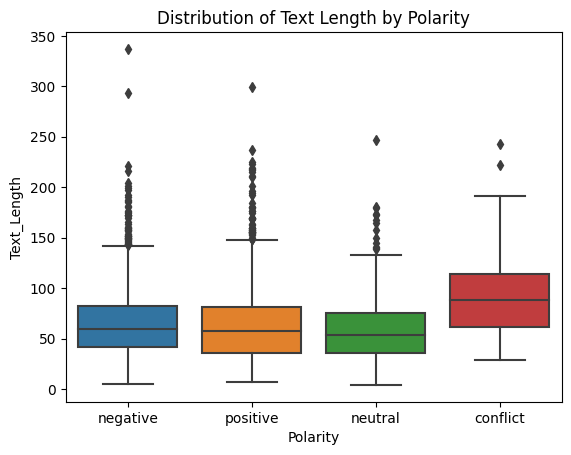

In [24]:
# Add a new column for text length
df['Text_Length'] = df['Text'].apply(len)

# Plot the distribution of text length for each polarity
import seaborn as sns

sns.boxplot(x='Polarity', y='Text_Length', data=df)
plt.title('Distribution of Text Length by Polarity')
plt.show()


In [25]:
from collections import Counter

# Tokenize the text
df['Tokens'] = df['Text'].apply(lambda x: x.split())

# Separate tokens by polarity
positive_tokens = df[df['Polarity'] == 'positive']['Tokens'].explode()
negative_tokens = df[df['Polarity'] == 'negative']['Tokens'].explode()
neutral_tokens = df[df['Polarity'] == 'neutral']['Tokens'].explode()
conflict_tokens = df[df['Polarity'] == 'conflict']['Tokens'].explode()

# Get the most common words in each polarity
common_positive_words = Counter(positive_tokens).most_common(10)
common_negative_words = Counter(negative_tokens).most_common(10)
common_neutral_words = Counter(neutral_tokens).most_common(10)
common_conflict_words = Counter(conflict_tokens).most_common(10)

# Print the results
print('Most Common Positive Words:', common_positive_words)
print('Most Common Negative Words:', common_negative_words)
print('Most Common Positive Words:', common_neutral_words)
print('Most Common Negative Words:', common_conflict_words)

Most Common Positive Words: [('এবং', 430), ('একটি', 273), ('আমি', 210), ('জন্য', 193), ('ভাল', 181), ('।', 147), ('এই', 130), ('ছিল', 129), ('এটি', 125), ('আমার', 120)]
Most Common Negative Words: [('না', 317), ('এই', 215), ('আর', 196), ('কি', 182), ('করে', 181), ('জন্য', 164), ('বাংলাদেশ', 159), ('আমাদের', 149), ('এবং', 140), ('আমরা', 134)]
Most Common Positive Words: [('আমি', 95), ('এবং', 59), ('আমরা', 48), ('জন্য', 47), ('একটি', 47), ('এই', 41), ('আমার', 39), ('।', 35), ('না', 31), ('করে', 27)]
Most Common Negative Words: [('কিন্তু', 37), ('এবং', 34), ('আমি', 30), ('একটি', 29), ('ছিল', 28), ('এটি', 26), ('জন্য', 24), ('ভাল', 20), ('কখনও', 14), ('খুব', 14)]


In [26]:
from matplotlib.font_manager import FontProperties
bengali_font = FontProperties(fname='Lohit-Bengali.ttf')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


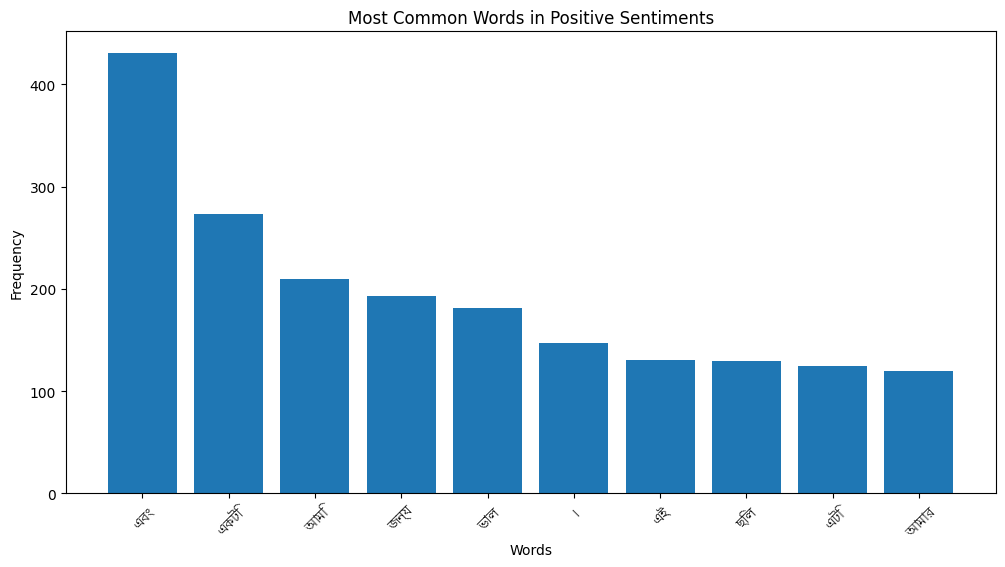

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


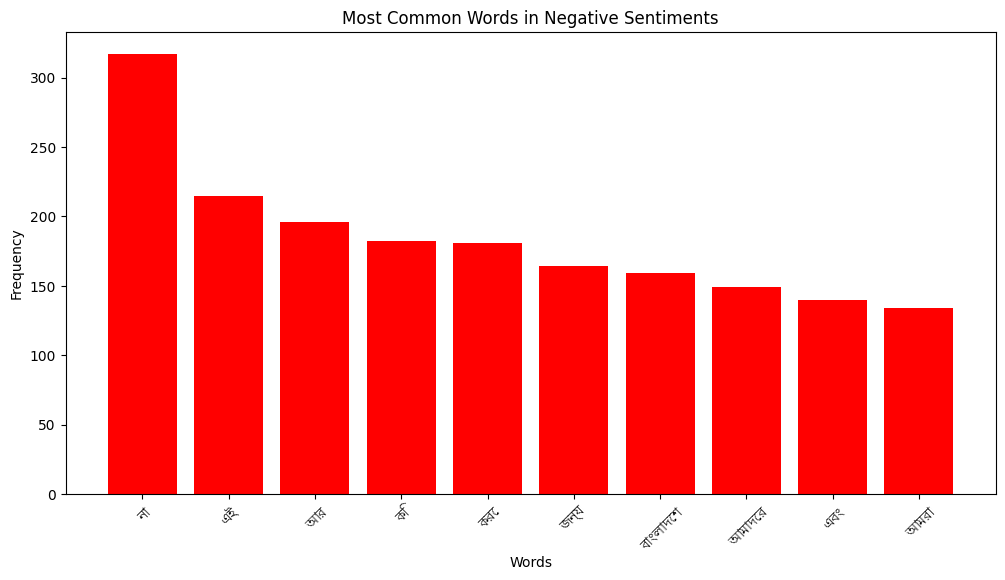

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


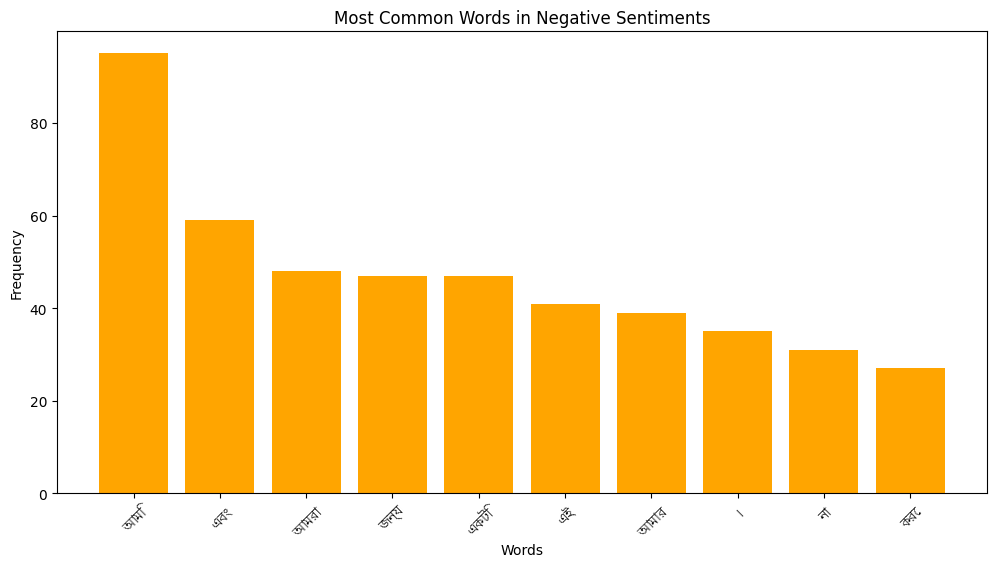

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


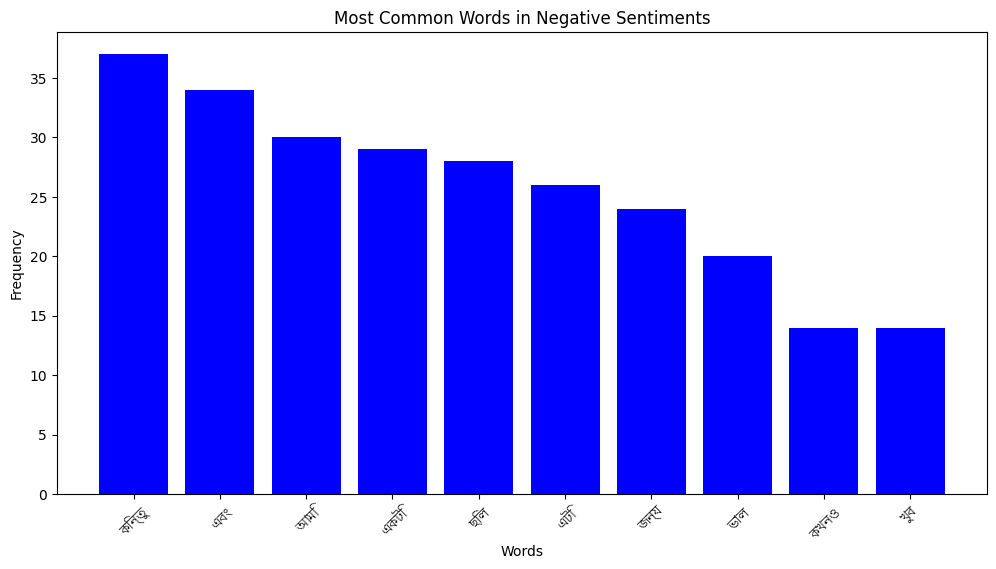

In [27]:
import matplotlib.pyplot as plt

# Plot common words for positive sentiment
plt.figure(figsize=(12, 6))
positive_words, positive_counts = zip(*common_positive_words)
plt.bar(positive_words, positive_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Positive Sentiments')
plt.xticks(rotation=45, fontproperties=bengali_font)
plt.show()

# Plot common words for negative sentiment
plt.figure(figsize=(12, 6))
negative_words, negative_counts = zip(*common_negative_words)
plt.bar(negative_words, negative_counts, color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Negative Sentiments')
plt.xticks(rotation=45, fontproperties=bengali_font)
plt.show()


# Plot common words for negative sentiment
plt.figure(figsize=(12, 6))
negative_words, negative_counts = zip(*common_neutral_words)
plt.bar(negative_words, negative_counts, color='orange')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Negative Sentiments')
plt.xticks(rotation=45, fontproperties=bengali_font)
plt.show()


# Plot common words for negative sentiment
plt.figure(figsize=(12, 6))
negative_words, negative_counts = zip(*common_conflict_words)
plt.bar(negative_words, negative_counts, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Negative Sentiments')
plt.xticks(rotation=45, fontproperties=bengali_font)
plt.show()


In [28]:
regex = r"[\u0980-\u09FF]+"

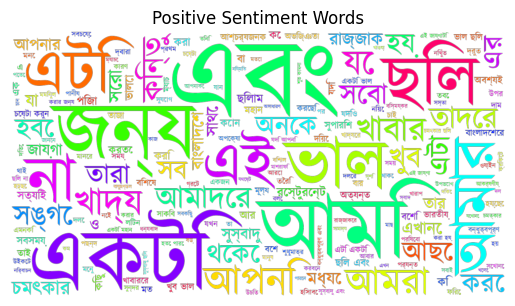

In [29]:
from wordcloud import WordCloud

# Generate word cloud for positive sentiment
positive_text = ' '.join(positive_tokens)
wordcloud = WordCloud(width=1500, height=800, mode="RGBA",background_color=None, colormap="hsv",
                font_path="kalpurush.ttf", regexp=regex).generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Sentiment Words')
plt.show()


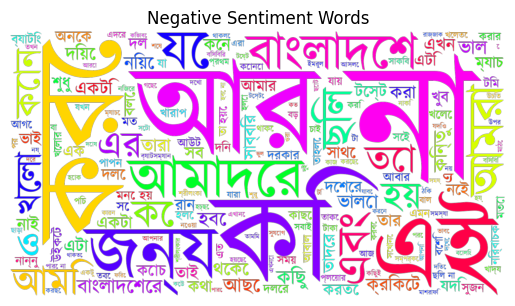

In [30]:
# Generate word cloud for negative sentiment
negative_text = ' '.join(negative_tokens)
wordcloud = WordCloud(width=1500, height=800, mode="RGBA",background_color=None, colormap="hsv",
               font_path="kalpurush.ttf", regexp=regex).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Sentiment Words')
plt.show()

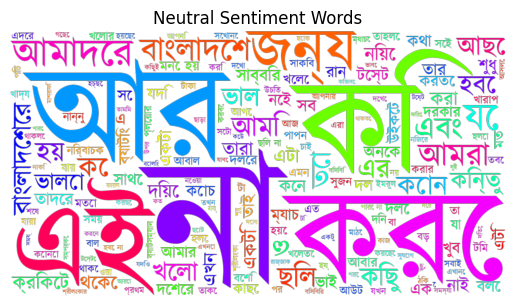

In [31]:
# Generate word cloud for Neutral sentiment
neutral_text = ' '.join(neutral_tokens)
wordcloud = WordCloud(width=1500, height=800, mode="RGBA",background_color=None, colormap="hsv",
               font_path="kalpurush.ttf", regexp=regex).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Neutral Sentiment Words')
plt.show()

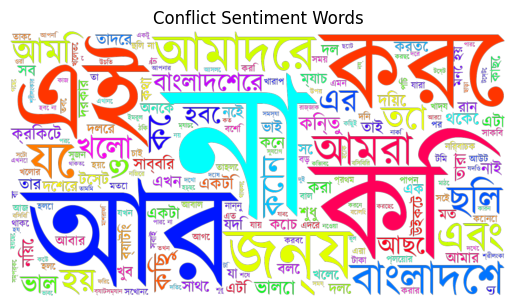

In [32]:
# Generate word cloud for Conflict sentiment
conflict_text = ' '.join(conflict_tokens)
wordcloud = WordCloud(width=1500, height=800, mode="RGBA",background_color=None, colormap="hsv",
               font_path="kalpurush.ttf", regexp=regex).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Conflict Sentiment Words')
plt.show()

# Modelling

In [33]:
data = final_df

In [34]:
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder

In [35]:
# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

In [36]:
# Encode the labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['Polarity'])

In [37]:
# Create a PyTorch dataset
class BengaliSentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        label = self.labels[index]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }


In [38]:
# Define a max sequence length for BERT; typically, this is 512
MAX_LEN = 512

In [39]:
data

,Text,Polarity,clean_sentence,clean_data,Text_Length,Tokens,label
0,"স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।",negative,স্টাফ কিন্তু আমাদের জন্য ভয়ঙ্কর ছিল,স্টাফ ভয়ঙ্কর,38,"[স্টাফ, কিন্তু,, আমাদের, জন্য, ভয়ঙ্কর, ছিল।]",1
1,"শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,পুরোপুরি ...",positive,শুধুমাত্ররিডামিং ফ্যাক্টর খাদ্য ছিলপুরোপুরি ন্...,শুধুমাত্ররিডামিং ফ্যাক্টর খাদ্য ছিলপুরোপুরি ন্...,155,"[শুধুমাত্র,রিডামিং, ফ্যাক্টর, খাদ্য, ছিল,পুরোপ...",3
2,"খাবার একদমই ব্যতিক্রমী, একটি খুব সক্ষম রান্নাঘ...",positive,খাবার একদমই ব্যতিক্রমী একটি খুব সক্ষম রান্নাঘর...,খাবার একদমই ব্যতিক্রমী সক্ষম রান্নাঘর যা গর্বে...,113,"[খাবার, একদমই, ব্যতিক্রমী,, একটি, খুব, সক্ষম, ...",3
3,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,positive,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,82,"[যেখানে, গাব্রিয়েলা, লোকালি, আপনাকে, শুভেচ্ছা...",3
4,"একবার গিয়ে এটি উপভোগ করবেন না, আমি বলতে পারেন ...",positive,একবার গিয়ে এটি উপভোগ করবেন না আমি বলতে পারেন য...,গিয়ে উপভোগ করবেন না বলতে পবে না,64,"[একবার, গিয়ে, এটি, উপভোগ, করবেন, না,, আমি, বলত...",3
...,...,...,...,...,...,...,...
4429,"এরা সব বেহায়া,আর মানুষিক বৈকল্য ধারী । না হলে ...",negative,এরা সব বেহায়াআর মানুষিক বৈকল্য ধারী না হলে এধর...,এরা বেহায়াআর মানুষিক বৈকল্য ধারী না হলে এধরণের...,110,"[এরা, সব, বেহায়া,আর, মানুষিক, বৈকল্য, ধারী, ।,...",1
4430,নির্বাচকমণ্ডলী দের গালে জুতা মারা উচিত.. হালা...,negative,নির্বাচকমণ্ডলী দের গালে জুতা মারা উচিত হালার প...,নির্বাচকমণ্ডলী দের গালে জুতা মারা হালার পুতরা ...,124,"[নির্বাচকমণ্ডলী, দের, গালে, জুতা, মারা, উচিত.....",1
4431,"বস ভাল করবে ইটাই আশা করি,দারুন এরজন ব্যাটিং অল...",negative,বস ভাল করবে ইটাই আশা করিদারুন এরজন ব্যাটিং অলর...,বস ভাল ইটাই আশা করিদারুন এরজন ব্যাটিং অলরাউন্ডার,55,"[বস, ভাল, করবে, ইটাই, আশা, করি,দারুন, এরজন, ব্...",1
4432,গুগল সার্চ করে মিনহাজের রানরেট দেখে নিন? এভারে...,negative,গুগল সার্চ করে মিনহাজের রানরেট দেখে নিন এভারেজ...,গুগল সার্চ মিনহাজের রানরেট দেখে নিন এভারেজ রান...,107,"[গুগল, সার্চ, করে, মিনহাজের, রানরেট, দেখে, নিন...",1


In [40]:
# Create the dataset
dataset = BengaliSentimentDataset(
    texts=data['clean_data'].to_numpy(),
    labels=data['label'].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

In [41]:
from torch.utils.data import random_split

# Split the dataset 80-10-10
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [42]:
from torch.utils.data import DataLoader

BATCH_SIZE = 8

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [43]:
from transformers import BertForSequenceClassification
import torch
from torch.nn import functional as F

In [44]:
# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained(
    "sagorsarker/bangla-bert-base",
    num_labels=len(label_encoder.classes_),  # The number of output labels
    output_attentions=False,
    output_hidden_states=False
)

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-ber

In [45]:
# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(102025, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [46]:
# Define a loss function and an optimizer
loss_function = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

In [47]:
# Training loop
EPOCHS = 2

In [48]:
from tqdm import tqdm

In [49]:
for epoch in range(EPOCHS):
    model.train()
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_function(outputs.logits, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            val_loss += loss_function(outputs.logits, labels).item()
            preds = torch.argmax(F.softmax(outputs.logits, dim=1), dim=1)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = val_correct / val_size

    print(f"Epoch {epoch + 1}/{EPOCHS} - Validation loss: {val_loss:.4f} - Validation Accuracy: {val_acc:.4f}")

  0%|                                                   | 0/388 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Ber

Epoch 1/2 - Validation loss: 0.7663 - Validation Accuracy: 0.7043


100%|███████████████████████████████████████████| 56/56 [01:39<00:00,  1.78s/it]

Epoch 2/2 - Validation loss: 0.7528 - Validation Accuracy: 0.7133


In [50]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np

In [51]:
# Store the true and predicted labels here
true_labels = []
pred_labels = []

In [52]:
model.eval()
with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(F.softmax(outputs.logits, dim=1), dim=1)
        
        true_labels += list(labels.cpu().numpy())
        pred_labels += list(preds.cpu().numpy())

100%|█████████████████████████████████████████| 111/111 [03:16<00:00,  1.77s/it]


In [53]:
# Convert the lists into numpy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

In [54]:
# Calculate Precision, Recall, F1 Score, and Classification Report
precision = precision_score(true_labels, pred_labels, average='weighted')
recall = recall_score(true_labels, pred_labels, average='weighted')
f1 = f1_score(true_labels, pred_labels, average='weighted')

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Print the classification report
report = classification_report(true_labels, pred_labels, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(report)

Precision: 0.6565
Recall: 0.6881
F1 Score: 0.6583

Classification Report:
              precision    recall  f1-score   support

    conflict       0.33      0.06      0.10        17
    negative       0.73      0.83      0.78       484
     neutral       0.39      0.08      0.13        88
    positive       0.63      0.67      0.65       299

    accuracy                           0.69       888
   macro avg       0.52      0.41      0.42       888
weighted avg       0.66      0.69      0.66       888

